In [1]:
import pandas as pd
import numpy as np
import joblib as jb
import seaborn as sns 
import xgboost as xgb
from matplotlib import pyplot as plt
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SVMSMOTE
from sklearn.compose import ColumnTransformer
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import f1_score, classification_report, confusion_matrix

In [2]:
df=pd.read_csv("../csv_files/insuranceFraud.csv").drop(columns='claim_number')
df.head()

age_of_driver gender  marital_status  safty_rating  annual_income  \
0             50      F             1.0            66          39117   
1             47      M             1.0            78          38498   
2             28      M             0.0            76          33343   
3             36      M             1.0            56          35832   
4             60      F             1.0            79          40948   

   high_education_ind  address_change_ind living_status  zip_code  claim_date  \
0                   1                   0           Own     50051    1/2/2016   
1                   1                   0           Own     50012  12/28/2015   
2                   0                   1          Rent     20158   2/26/2016   
3                   1                   0           Own     50054   9/20/2015   
4                   1                   1          Rent     80010   4/14/2015   

   ... liab_prct channel  policy_report_filed_ind  claim_est_payout  \
0  ...        18  Broker                        0       5464.903723   
1  ...        81  Broker                        0       5448.155974   
2  ...        94  Broker                        1       1858.971699   
3  ...        95   Phone                        0       4040.932844   
4  ...        53   Phone                        1       4876.606138   

   age_of_vehicle vehicle_category  vehicle_price  vehicle_color  \
0             3.0            Large    16786.28845           blue   
1             4.0            Large    20793.29881          black   
2             4.0          Compact     6729.47649           blue   
3             5.0          Compact    24914.26785           gray   
4             6.0           Medium    17392.41997          black   

   vehicle_weight fraud  
0    34183.436390     0  
1    14528.379730     0  
2     7182.832636     0  
3    47891.788790     0  
4     7546.494014     0  

[5 rows x 24 columns]

In [3]:
df.describe()

age_of_driver  marital_status  safty_rating  annual_income  \
count   19000.000000    18996.000000  19000.000000   19000.000000   
mean       43.605368        0.716625     73.575211   37343.942895   
std        12.042639        0.450649     15.388084    2969.160303   
min        18.000000        0.000000      1.000000      -1.000000   
25%        35.000000        0.000000     65.000000   35551.000000   
50%        43.000000        1.000000     76.000000   37609.000000   
75%        51.000000        1.000000     85.000000   39318.000000   
max       278.000000        1.000000    100.000000   56275.000000   

       high_education_ind  address_change_ind      zip_code  \
count        19000.000000        19000.000000  19000.000000   
mean             0.696842            0.574000  50020.455211   
std              0.459635            0.494507  29179.200999   
min              0.000000            0.000000      0.000000   
25%              0.000000            0.000000  20112.000000   
50%              1.000000            1.000000  50028.000000   
75%              1.000000            1.000000  80040.000000   
max              1.000000            1.000000  85083.000000   

       past_num_of_claims  witness_present_ind     liab_prct  \
count        19000.000000         18857.000000  19000.000000   
mean             0.499684             0.236888     49.440158   
std              0.949318             0.425184     33.665171   
min              0.000000             0.000000      0.000000   
25%              0.000000             0.000000     17.000000   
50%              0.000000             0.000000     50.000000   
75%              1.000000             0.000000     81.000000   
max              6.000000             1.000000    100.000000   

       policy_report_filed_ind  claim_est_payout  age_of_vehicle  \
count             19000.000000      18977.000000    18993.000000   
mean                  0.600000       4997.514848        4.994050   
std                   0.489911       2235.301290        2.246174   
min                   0.000000        417.826352        0.000000   
25%                   0.000000       3363.778231        3.000000   
50%                   1.000000       4669.858508        5.000000   
75%                   1.000000       6275.376268        6.000000   
max                   1.000000      23903.366250       16.000000   

       vehicle_price  vehicle_weight         fraud  
count   19000.000000    19000.000000  19000.000000  
mean    23042.319551    23004.473575      0.154632  
std     11989.010656    12117.439182      0.361563  
min      2261.507903     2429.429302      0.000000  
25%     14243.413855    14109.824760      0.000000  
50%     20870.952460    20802.839055      0.000000  
75%     29457.601303    29415.104935      0.000000  
max    127063.506000   103192.723700      1.000000

In [4]:
df.fraud.value_counts()

fraud
0    16062
1     2938
Name: count, dtype: int64

In [5]:
inputs=df.drop(columns="fraud")
targets=df.fraud

x_train,x_test,y_train,y_test=train_test_split(inputs,targets,test_size=.2,random_state=1)
print(x_train.shape)
print(y_train.shape)

(15200, 23)
(15200,)


In [6]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15200 entries, 14759 to 235
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age_of_driver            15200 non-null  int64  
 1   gender                   15200 non-null  object 
 2   marital_status           15197 non-null  float64
 3   safty_rating             15200 non-null  int64  
 4   annual_income            15200 non-null  int64  
 5   high_education_ind       15200 non-null  int64  
 6   address_change_ind       15200 non-null  int64  
 7   living_status            15200 non-null  object 
 8   zip_code                 15200 non-null  int64  
 9   claim_date               15200 non-null  object 
 10  claim_day_of_week        15200 non-null  object 
 11  accident_site            15200 non-null  object 
 12  past_num_of_claims       15200 non-null  int64  
 13  witness_present_ind      15082 non-null  float64
 14  liab_prct                

In [7]:
x_train.isnull().sum()

age_of_driver                0
gender                       0
marital_status               3
safty_rating                 0
annual_income                0
high_education_ind           0
address_change_ind           0
living_status                0
zip_code                     0
claim_date                   0
claim_day_of_week            0
accident_site                0
past_num_of_claims           0
witness_present_ind        118
liab_prct                    0
channel                      0
policy_report_filed_ind      0
claim_est_payout            16
age_of_vehicle               5
vehicle_category             0
vehicle_price                0
vehicle_color                0
vehicle_weight               0
dtype: int64

In [8]:
print(x_train['living_status'].unique())
print(x_train['marital_status'].unique())
print(x_train['channel'].unique())
print(x_train['vehicle_category'].unique())
print(x_train['accident_site'].unique())

['Rent' 'Own']
[ 1.  0. nan]
['Broker' 'Phone' 'Online']
['Compact' 'Medium' 'Large']
['Local' 'Highway' 'Parking Lot']


In [9]:
x_train['marital_status']=x_train['marital_status'].fillna(x_train['marital_status'].mode()[0])
x_train['witness_present_ind']=x_train['witness_present_ind'].fillna(x_train['witness_present_ind'].mode()[0])
x_train['claim_est_payout']=x_train['claim_est_payout'].fillna(x_train['claim_est_payout'].median())
x_train['age_of_vehicle']=x_train['age_of_vehicle'].fillna(x_train['age_of_vehicle'].median())

In [10]:
x_train.isnull().sum().sum()

np.int64(0)

<Axes: xlabel='fraud', ylabel='annual_income'>

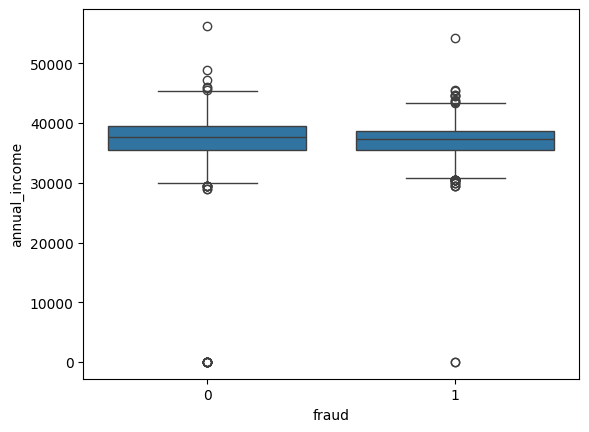

In [11]:
sns.boxplot(x=y_train,y=x_train['annual_income'])

In [12]:
sns.boxplot(x=x_train.gender,y=x_train.age_of_driver)

<Axes: xlabel='gender', ylabel='age_of_driver'>

In [13]:
possible_outliers_features=['annual_income','age_of_driver']

for feature in possible_outliers_features :
    q1=x_train[feature].quantile(.25)
    q3=x_train[feature].quantile(.75)
    iqr=q3-q1

    low_bound=q1-1.5*iqr
    upper_bound=q3+1.5*iqr

    x_train[feature] = x_train[feature].astype(float)

    x_train.loc[(x_train[feature]<low_bound) | (x_train[feature]>upper_bound),feature]=x_train[feature].mean()

In [14]:
sns.boxplot(x=y_train,y=x_train['annual_income'])

<Axes: xlabel='fraud', ylabel='annual_income'>

In [15]:
sns.boxplot(x=x_train.gender,y=x_train.age_of_driver)

<Axes: xlabel='gender', ylabel='age_of_driver'>

In [16]:
df[['claim_date','claim_day_of_week']].head()

claim_date claim_day_of_week
0    1/2/2016          Saturday
1  12/28/2015            Monday
2   2/26/2016            Friday
3   9/20/2015            Sunday
4   4/14/2015           Tuesday

In [17]:
x_train['claim_day_of_year']=pd.to_datetime(x_train.claim_date).dt.dayofyear
x_test['claim_day_of_year']=pd.to_datetime(x_test.claim_date).dt.dayofyear

x_train['claim_day_of_week']=pd.to_datetime(x_train.claim_date).dt.day_name()
x_test['claim_day_of_week']=pd.to_datetime(x_test.claim_date).dt.day_name()

num_features=['age_of_driver', 'age_of_vehicle', 'marital_status', 'zip_code', 'safty_rating',
                      'witness_present_ind', 'annual_income', 'high_education_ind',
                      'policy_report_filed_ind', 'address_change_ind', 'past_num_of_claims', 'liab_prct',
                      'claim_est_payout', 'vehicle_price', 'vehicle_weight', 'claim_day_of_year']

cat_features = ['gender', 'living_status', 'accident_site',  'channel',
                        'vehicle_category', 'vehicle_color', 'claim_day_of_week']


preprocessor=ColumnTransformer(
    [
        ('num',StandardScaler(),num_features),
        ('cat',OneHotEncoder(drop='first', handle_unknown='ignore'),cat_features)
    ],
    remainder='drop'
)

x_train_scaled=pd.DataFrame(preprocessor.fit_transform(x_train),columns=preprocessor.get_feature_names_out())
x_test_scaled=pd.DataFrame(preprocessor.transform(x_test),columns=preprocessor.get_feature_names_out())

x_train_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15200 entries, 0 to 15199
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   num__age_of_driver                15200 non-null  float64
 1   num__age_of_vehicle               15200 non-null  float64
 2   num__marital_status               15200 non-null  float64
 3   num__zip_code                     15200 non-null  float64
 4   num__safty_rating                 15200 non-null  float64
 5   num__witness_present_ind          15200 non-null  float64
 6   num__annual_income                15200 non-null  float64
 7   num__high_education_ind           15200 non-null  float64
 8   num__policy_report_filed_ind      15200 non-null  float64
 9   num__address_change_ind           15200 non-null  float64
 10  num__past_num_of_claims           15200 non-null  float64
 11  num__liab_prct                    15200 non-null  float64
 12  num_

In [18]:
x_train_scaled.describe()


num__age_of_driver  num__age_of_vehicle  num__marital_status  \
count        1.520000e+04         1.520000e+04         1.520000e+04   
mean        -4.543734e-16         1.776357e-16         3.622833e-17   
std          1.000033e+00         1.000033e+00         1.000033e+00   
min         -2.261141e+00        -2.215950e+00        -1.584934e+00   
25%         -7.377646e-01        -8.822386e-01        -1.584934e+00   
50%         -2.088176e-02         6.902543e-03         6.309412e-01   
75%          6.960010e-01         4.514731e-01         6.309412e-01   
max          2.846649e+00         4.897179e+00         6.309412e-01   

       num__zip_code  num__safty_rating  num__witness_present_ind  \
count   1.520000e+04       1.520000e+04              1.520000e+04   
mean   -1.168656e-17      -1.065814e-16              3.739699e-17   
std     1.000033e+00       1.000033e+00              1.000033e+00   
min    -1.707110e+00      -4.663740e+00             -5.537397e-01   
25%    -1.017864e+00      -5.121380e-01             -5.537397e-01   
50%     7.419452e-03       1.553744e-01             -5.537397e-01   
75%     1.035959e+00       7.414829e-01             -5.537397e-01   
max     1.208861e+00       1.718330e+00              1.805903e+00   

       num__annual_income  num__high_education_ind  \
count        1.520000e+04             1.520000e+04   
mean         2.731850e-15             4.207161e-18   
std          1.000033e+00             1.000033e+00   
min         -2.718619e+00            -1.515409e+00   
25%         -6.676939e-01            -1.515409e+00   
50%          8.300967e-02             6.598878e-01   
75%          7.066487e-01             6.598878e-01   
max          2.745160e+00             6.598878e-01   

       num__policy_report_filed_ind  num__address_change_ind  ...  \
count                  1.520000e+04             1.520000e+04  ...   
mean                  -5.983518e-17            -6.591219e-17  ...   
std                    1.000033e+00             1.000033e+00  ...   
min                   -1.228109e+00            -1.158787e+00  ...   
25%                   -1.228109e+00            -1.158787e+00  ...   
50%                    8.142602e-01             8.629716e-01  ...   
75%                    8.142602e-01             8.629716e-01  ...   
max                    8.142602e-01             8.629716e-01  ...   

       cat__vehicle_color_other  cat__vehicle_color_red  \
count              15200.000000            15200.000000   
mean                   0.143092                0.143224   
std                    0.350178                0.350312   
min                    0.000000                0.000000   
25%                    0.000000                0.000000   
50%                    0.000000                0.000000   
75%                    0.000000                0.000000   
max                    1.000000                1.000000   

       cat__vehicle_color_silver  cat__vehicle_color_white  \
count               15200.000000              15200.000000   
mean                    0.141579                  0.143882   
std                     0.348629                  0.350981   
min                     0.000000                  0.000000   
25%                     0.000000                  0.000000   
50%                     0.000000                  0.000000   
75%                     0.000000                  0.000000   
max                     1.000000                  1.000000   

       cat__claim_day_of_week_Monday  cat__claim_day_of_week_Saturday  \
count                   15200.000000                     15200.000000   
mean                        0.146053                         0.141711   
std                         0.353171                         0.348764   
min                         0.000000                         0.000000   
25%                         0.000000                         0.000000   
50%                         0.000000                         0.000000   
75%                         0.0000

In [19]:
oversample=SVMSMOTE(random_state=1)
x_train_balenced,y_train_balenced=oversample.fit_resample(x_train_scaled,y_train)

pd.Series(y_train_balenced).value_counts()

/usr/local/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


fraud
0    12857
1    12857
Name: count, dtype: int64

/tmp/ipykernel_27/2891032263.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels([gender_labels[int(float(item.get_text()))] for item in plot.get_xticklabels()])


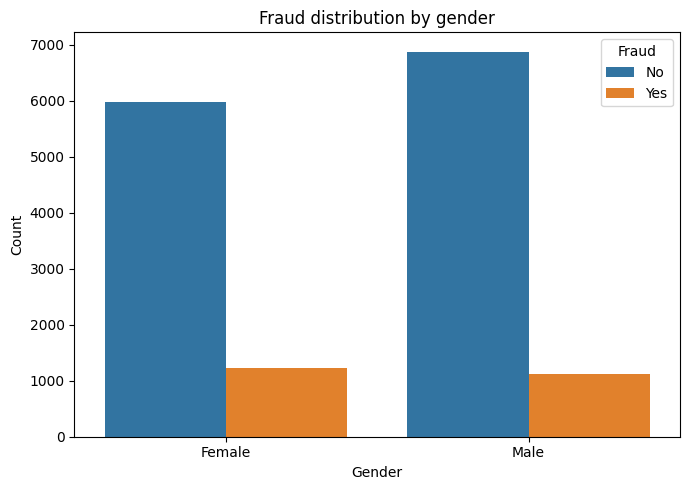

In [20]:
gender_labels={0:'Female',1:'Male'}

data=pd.concat([x_train_scaled,y_train.reset_index(drop=True)],axis=1)

plt.figure(figsize=(7,5))
plot=sns.countplot(x='cat__gender_M',hue='fraud',data=data)
plt.title("Fraud distribution by gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plot.set_xticklabels([gender_labels[int(float(item.get_text()))] for item in plot.get_xticklabels()])

handles, labels = plot.get_legend_handles_labels()
plot.legend(handles, ['No', 'Yes'], title='Fraud')

plt.tight_layout() 
plt.show()

In [21]:
data=pd.concat([x_train,y_train],axis=1)

plt.figure(figsize=(7,5))
plot=sns.countplot(x='accident_site',hue='fraud',data=data)
plt.xlabel("Accident site")
plt.ylabel("Fraud count")
plt.title("Accident distribution by fraud")

handles, labels = plot.get_legend_handles_labels()
plot.legend(handles, ['No', 'Yes'], title='Fraud')

plt.tight_layout() 
plt.show()

In [22]:
data['age_groups'] = pd.cut(
    x_train['age_of_driver'],
    bins=[17, 30, 45, 55, 65, 100],
    labels=['18-30', '31-45', '46-55', '56-65', '66+']
)

plt.figure(figsize=(10,5))
plot=sns.countplot(x='age_groups',hue='fraud',data=data)
plt.xlabel('Age groups')
plt.ylabel('Fraud counts')

handeles,labels=plot.get_legend_handles_labels()
plot.legend(handles,['No','Yes'],title="Fraud")

plt.tight_layout()  
plt.show()


In [23]:
fraud_labels={0:'No',1:'Yes'}

plt.subplots(figsize=(8, 5))
plot=sns.boxplot(x='fraud',y="annual_income",data=data)
plt.title('Annual Income by Fraud Status (X Scaled)')
plt.xlabel('Fraud')
plt.ylabel('Annual Income')
plot.set_xticklabels([fraud_labels[int(item.get_text())] for item in plot.get_xticklabels()])

plt.tight_layout()  
plt.show()

/tmp/ipykernel_27/3276591608.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels([fraud_labels[int(item.get_text())] for item in plot.get_xticklabels()])


In [24]:
plot.get_xticklabels()

[Text(0, 0, 'No'), Text(1, 0, 'Yes')]

# Model Def

In [25]:
x_train_balenced.shape,y_train_balenced.shape

((25714, 36), (25714,))

In [26]:
x_test_scaled.shape,y_test.shape

((3800, 36), (3800,))

- XGBOOST & GridSearchCV

In [27]:
xgb_model=xgb.XGBClassifier(random_state=1)

grid_params_xgb={
    'n_estimators':[20,30,50,70,100],
    'learning_rate':[.1,.3],
    'max_depth':[2,3,7,20],
}

grid_search_xgb=GridSearchCV(
    estimator=xgb_model,
    param_grid=grid_params_xgb,
    cv=5, 
    scoring='f1'
)

grid_search_xgb.fit(x_train_balenced,y_train_balenced)

best_score=grid_search_xgb.best_score_
best_estimator=grid_search_xgb.best_estimator_
best_params=grid_search_xgb.best_params_


print(f"Best score (F1) : {best_score}")
print(f"Best parametres : {best_params}")

Best score (F1) : 0.8369452073609012
Best parametres : {'learning_rate': 0.1, 'max_depth': 20, 'n_estimators': 30}


- Results

In [28]:
train_predictions=best_estimator.predict(x_train_balenced)
test_predictions=best_estimator.predict(x_test_scaled)

#F1 SCORES
train_f1_score=f1_score(y_train_balenced,train_predictions, average='weighted')
test_f1_score=f1_score(y_test,test_predictions, average='weighted')

print(f"Training F1 score {train_f1_score}")
print(f"testing F1 score {test_f1_score}")


#Classification Report on test Data
print("Classification Report on test Data")
print(classification_report(y_test,test_predictions))


Training F1 score 0.9986388730221312
testing F1 score 0.7877075585588003
Classification Report on test Data
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      3205
           1       0.34      0.10      0.16       595

    accuracy                           0.83      3800
   macro avg       0.60      0.53      0.53      3800
weighted avg       0.77      0.83      0.79      3800



- Confusion Matrix

In [29]:
confusion_matrix=confusion_matrix(y_test,test_predictions)

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix,annot=True, fmt='d', cmap='Blues',)
plt.title("confusion Matrix")
plt.xlabel("Predictions")
plt.ylabel("Truth")

plt.tight_layout()
plt.show()

- Extracting most imoprtant features

In [30]:
importance=best_estimator.feature_importances_
sorted_indices = np.argsort(importance)[::-1] 
features_names=preprocessor.get_feature_names_out()

top_n = 10
sorted_features_importance = [features_names[i] for i in sorted_indices[:top_n]]

print("Top Features by Importance:")
for i, feature in enumerate(sorted_features_importance):
    print(f"{i+1}. [{feature}] : {importance[sorted_indices[i]]}")

Top Features by Importance:
1. [num__high_education_ind] : 0.41279447078704834
2. [num__past_num_of_claims] : 0.11115045100450516
3. [cat__gender_M] : 0.06717538088560104
4. [num__address_change_ind] : 0.038889527320861816
5. [num__witness_present_ind] : 0.03771427646279335
6. [num__marital_status] : 0.020459389314055443
7. [cat__channel_Phone] : 0.020230039954185486
8. [cat__accident_site_Parking Lot] : 0.019202467054128647
9. [cat__living_status_Rent] : 0.017699461430311203
10. [cat__vehicle_category_Medium] : 0.013708977960050106


In [31]:
plt.figure(figsize=(15,7))
plt.barh(sorted_features_importance,importance[sorted_indices[:top_n]], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title("Top 10 Feature Importances in XGBoost")

plt.show()


- trainning the Model using only the most 10 important features

In [32]:
x_train_selected=x_train_balenced.iloc[:,sorted_indices[:10]]
x_test_selected=x_test_scaled.iloc[:,sorted_indices[:10]]

xgb_model_selected=xgb.XGBClassifier(**best_params,random_state=1)
xgb_model_selected.fit(x_train_selected, y_train_balenced)

train_predictions=xgb_model_selected.predict(x_train_selected)
test_predictions=xgb_model_selected.predict(x_test_selected)

train_f1_score=f1_score(y_train_balenced, train_predictions, average='weighted')  
test_f1_score=f1_score(y_test, test_predictions, average='weighted')  

In [35]:
x_train_selected.head()

num__high_education_ind  num__past_num_of_claims  cat__gender_M  \
0                 0.659888                 0.521397            1.0   
1                 0.659888                -0.526361            1.0   
2                 0.659888                -0.526361            0.0   
3                 0.659888                 0.521397            0.0   
4                -1.515409                -0.526361            0.0   

   num__address_change_ind  num__witness_present_ind  num__marital_status  \
0                -1.158787                  1.805903             0.630941   
1                 0.862972                 -0.553740             0.630941   
2                -1.158787                 -0.553740             0.630941   
3                -1.158787                  1.805903             0.630941   
4                 0.862972                 -0.553740             0.630941   

   cat__channel_Phone  cat__accident_site_Parking Lot  \
0                 0.0                             0.0   
1                 1.0                             0.0   
2                 0.0                             1.0   
3                 0.0                             0.0   
4                 1.0                             0.0   

   cat__living_status_Rent  cat__vehicle_category_Medium  
0                      1.0                           0.0  
1                      1.0                           1.0  
2                      0.0                           0.0  
3                      1.0                           0.0  
4                      0.0                           0.0

In [33]:
train_predictions=xgb_model_selected.predict(x_train_selected)
test_predictions=xgb_model_selected.predict(x_test_selected)

#F1 SCORES
train_f1_score=f1_score(y_train_balenced,train_predictions, average='weighted')
test_f1_score=f1_score(y_test,test_predictions, average='weighted')

print(f"Training F1 score: {train_f1_score}")
print(f"Testing F1 score: {test_f1_score}")


#Classification Report on test Data
print("Classification Report on test Data")
print(classification_report(y_test,test_predictions))

Training F1 score: 0.8937069934327049
Testing F1 score: 0.7794845799012242
Classification Report on test Data
              precision    recall  f1-score   support

           0       0.85      0.97      0.91      3205
           1       0.29      0.06      0.10       595

    accuracy                           0.83      3800
   macro avg       0.57      0.52      0.50      3800
weighted avg       0.76      0.83      0.78      3800



# Exporting features infos "mean,mode,deviation"

In [31]:
preprocessor.get_feature_names_out()

array(['num__age_of_driver', 'num__age_of_vehicle', 'num__marital_status',
       'num__zip_code', 'num__safty_rating', 'num__witness_present_ind',
       'num__annual_income', 'num__high_education_ind',
       'num__policy_report_filed_ind', 'num__address_change_ind',
       'num__past_num_of_claims', 'num__liab_prct',
       'num__claim_est_payout', 'num__vehicle_price',
       'num__vehicle_weight', 'num__claim_day_of_year', 'cat__gender_M',
       'cat__living_status_Rent', 'cat__accident_site_Local',
       'cat__accident_site_Parking Lot', 'cat__channel_Online',
       'cat__channel_Phone', 'cat__vehicle_category_Large',
       'cat__vehicle_category_Medium', 'cat__vehicle_color_blue',
       'cat__vehicle_color_gray', 'cat__vehicle_color_other',
       'cat__vehicle_color_red', 'cat__vehicle_color_silver',
       'cat__vehicle_color_white', 'cat__claim_day_of_week_Monday',
       'cat__claim_day_of_week_Saturday', 'cat__claim_day_of_week_Sunday',
       'cat__claim_day_of_week_T

In [30]:
preprocessor.named_transformers_['num'].mean_

array([4.32330285e+01, 4.98447368e+00, 7.15263158e-01, 4.98105132e+04,
       7.36141447e+01, 2.34671053e-01, 3.73826561e+04, 6.96644737e-01,
       6.01315789e-01, 5.73157895e-01, 5.02368421e-01, 4.92113158e+01,
       4.99332501e+03, 2.30027268e+04, 2.29952631e+04, 1.81807763e+02])

In [37]:
preprocessor.named_transformers_['num'].scale_

Index(['age_of_driver', 'gender', 'marital_status', 'safty_rating',
       'annual_income', 'high_education_ind', 'address_change_ind',
       'living_status', 'zip_code', 'claim_date', 'claim_day_of_week',
       'accident_site', 'past_num_of_claims', 'witness_present_ind',
       'liab_prct', 'channel', 'policy_report_filed_ind', 'claim_est_payout',
       'age_of_vehicle', 'vehicle_category', 'vehicle_price', 'vehicle_color',
       'vehicle_weight', 'claim_day_of_year'],
      dtype='object')

In [39]:
columns=num_features
data=[
    preprocessor.named_transformers_['num'].mean_,
    preprocessor.named_transformers_['num'].scale_
]
index=['mean','scale']

df_ss_info=pd.DataFrame(data,columns=columns,index=index)

df_ss_info

age_of_driver  age_of_vehicle  marital_status      zip_code  \
mean       43.233028        4.984474        0.715263  49810.513224   
scale      11.159425        2.249362        0.451289  29178.270764   

       safty_rating  witness_present_ind  annual_income  high_education_ind  \
mean      73.614145             0.234671   37382.656113            0.696645   
scale     15.355519             0.423793    2738.763944            0.459707   

       policy_report_filed_ind  address_change_ind  past_num_of_claims  \
mean                  0.601316            0.573158            0.502368   
scale                 0.489628            0.494619            0.954419   

       liab_prct  claim_est_payout  vehicle_price  vehicle_weight  \
mean   49.211316       4993.325013   23002.726836    22995.263066   
scale  33.572697       2225.576092   12011.252447    12089.716114   

       claim_day_of_year  
mean          181.807763  
scale         105.642222

In [42]:
important_columns=['marital_status','witness_present_ind','high_education_ind','past_num_of_claims','address_change_ind']
df_ss_info=df_ss_info[important_columns]
df_ss_info.to_csv("../csv_files/insurance_data_mean_scale.csv")
df_ss_info

marital_status  witness_present_ind  high_education_ind  \
mean         0.715263             0.234671            0.696645   
scale        0.451289             0.423793            0.459707   

       past_num_of_claims  address_change_ind  
mean             0.502368            0.573158  
scale            0.954419            0.494619

In [18]:
df_mode_info=x_train[['gender','marital_status','channel','accident_site','living_status','vehicle_category']].mode()
df_mode_info=df_mode_info.rename(index={0:"mode"})
df_mode_info.to_csv("../csv_files/insurance_data_mode.csv")
df_mode_info

gender  marital_status channel accident_site living_status  \
mode      M             1.0  Broker         Local           Own   

     vehicle_category  
mode          Compact

# Serialization

- Serialiwing the model

In [65]:
jb.dump(xgb_model_selected,"insuranceFraudeModel.pkl")

['insuranceFraudeModel.pkl']

- Serializing the preprocessor

In [66]:
jb.dump(preprocessor,"preprocessors/insurance_fraud_data_preprocessor.pkl")

['preprocessors/insurance_fraud_data_preprocessor.pkl']

In [68]:
x_train_selected.columns

Index(['num__high_education_ind', 'num__past_num_of_claims', 'cat__gender_M',
       'num__address_change_ind', 'num__witness_present_ind',
       'num__marital_status', 'cat__channel_Phone',
       'cat__accident_site_Parking Lot', 'cat__living_status_Rent',
       'cat__vehicle_category_Medium'],
      dtype='object')